<a href="https://colab.research.google.com/github/DurgaAtmakuri/Numpy_Fundamentals/blob/main/kmeans_clustering_updated_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import numpy as np


In [2]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
X

array([5.46529806e-01, 8.49423892e-01, 4.76711188e-01, 4.66394735e-01,
       8.14321115e-01, 5.31494812e-01, 4.23610821e-01, 7.55035111e-01,
       8.16252889e-02, 4.34935159e-01, 3.55438519e-01, 3.08073404e-01,
       4.24297963e-01, 4.68122273e-01, 8.64282204e-01, 2.03150789e-01,
       2.48797845e-01, 4.21648689e-01, 1.19584109e-01, 4.36474347e-01,
       1.05002083e-01, 8.78136926e-02, 8.60510469e-01, 8.06964183e-02,
       3.02892532e-01, 8.30213122e-02, 6.00764091e-01, 9.70950226e-01,
       5.40740436e-03, 4.54510810e-01, 1.54553344e-01, 4.21075793e-01,
       2.43023192e-03, 6.40991716e-01, 1.03561102e-01, 1.02080184e-01,
       1.10900984e-01, 9.36664873e-01, 4.68583934e-01, 6.06721118e-01,
       5.06029913e-01, 2.17134457e-01, 3.82029139e-01, 9.78676745e-01,
       2.24288017e-02, 4.82815894e-01, 4.25237788e-01, 2.72256106e-01,
       1.35746680e-01, 4.20338892e-01, 5.01018501e-02, 1.05107335e-01,
       6.94879047e-01, 5.04897584e-01, 8.51289165e-01, 9.03954705e-01,
      

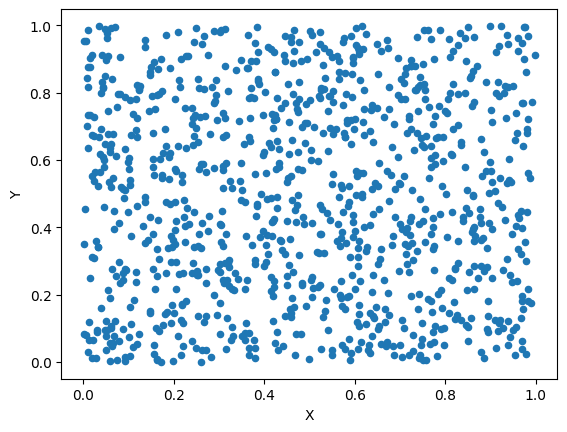

In [3]:
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy
df_xy.X = X
df_xy.Y = Y
df_xy
df_xy.plot(x="X",y = "Y",kind="scatter")
model1 = KMeans(n_clusters=5).fit(df_xy)



<Axes: xlabel='X', ylabel='Y'>

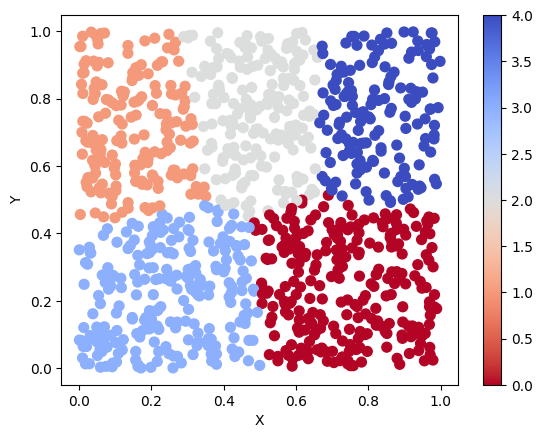

In [4]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r)

In [5]:
Univ = pd.read_csv("Universities_Clustering.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [6]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [7]:
df_norm = norm_func(Univ.iloc[:,1:])

In [8]:
df_norm.head(10)  # Top 10 rows


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


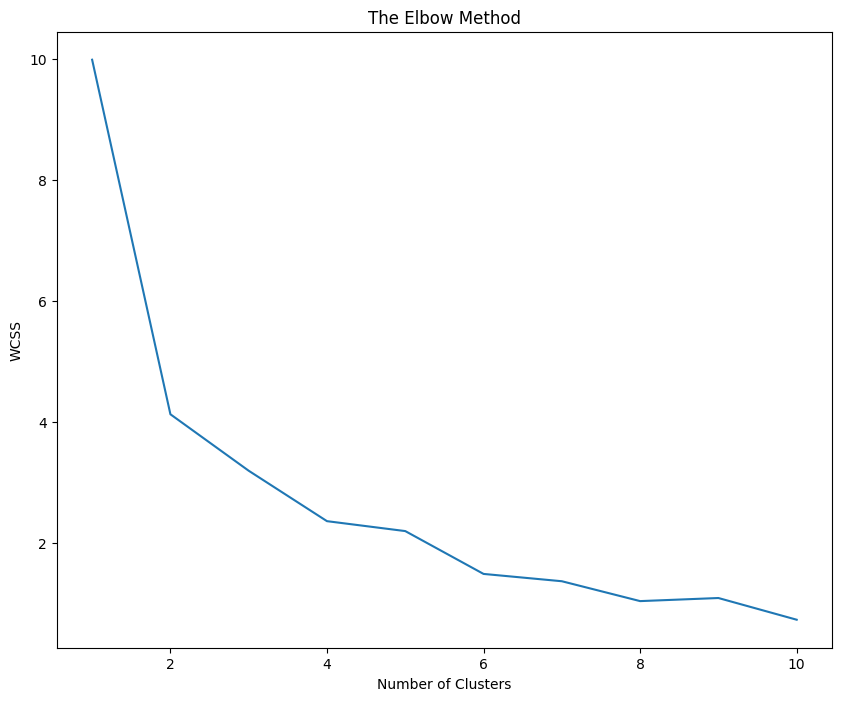

In [9]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [10]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)

In [11]:
y_kmeans
#clf.cluster_centers_
clf.labels_

array([2, 0, 4, 3, 3, 2, 2, 3, 2, 0, 2, 3, 3, 1, 2, 1, 2, 1, 3, 3, 1, 3,
       3, 1, 2], dtype=int32)

In [12]:
y_kmeans

array([2, 0, 4, 3, 3, 2, 2, 3, 2, 0, 2, 3, 3, 1, 2, 1, 2, 1, 3, 3, 1, 3,
       3, 1, 2], dtype=int32)

In [13]:
clf.cluster_centers_

array([[0.86585366, 0.82638889, 0.26973684, 0.02631579, 0.95549562,
        0.56666667],
       [0.19560976, 0.22222222, 0.73157895, 0.66315789, 0.04287146,
        0.24666667],
       [0.85823171, 0.87673611, 0.09868421, 0.25657895, 0.45879882,
        0.91666667],
       [0.63821138, 0.73148148, 0.30116959, 0.3625731 , 0.26883255,
        0.72962963],
       [0.62195122, 0.47222222, 0.59210526, 0.15789474, 0.29746132,
        0.16666667]])

In [14]:
clf.inertia_

1.881023104747003

In [15]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object
Univ['clust']=md # creating a  new column and assigning it to new column
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,3
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [16]:
Univ.iloc[:,1:7].groupby(Univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
1,1085.200000,44.000000,69.600000,18.600000,11056.400000,74.400000
2,1356.875000,91.125000,21.500000,10.875000,33878.750000,94.500000
3,1266.666667,80.666667,36.888889,12.888889,23455.111111,88.888889
4,1260.000000,62.000000,59.000000,9.000000,25026.000000,72.000000


In [17]:
plt.style.use(['classic'])
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Clusters using KMeans')

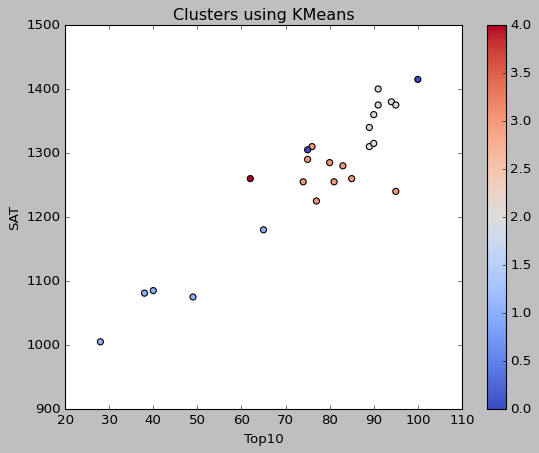

In [18]:
Univ.plot(x="Top10",y ="SAT",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans')

In [19]:
WCSS

[9.988235196638557,
 4.123452442397181,
 3.1894984355997553,
 2.355338796946114,
 2.191218021942497,
 1.48268658747065,
 1.3616528586139607,
 1.0329182266672727,
 1.0840954209855562,
 0.7250419905949226]